## Imports

In [405]:
import scipy.io.wavfile
from scipy.signal import spectrogram
from scipy.signal import butter, lfilter, freqz, filtfilt
import matplotlib.pyplot as plt
import numpy as np
import wave

## Read clean wav file and split into 2 channels

In [406]:
# Read the .wav file
sample_rate, data = scipy.io.wavfile.read('piano_short.wav')

spf = wave.open('piano_short.wav', 'rb')
sampleRate = spf.getframerate()
ampWidth = spf.getsampwidth()
nChannels = spf.getnchannels()
nFrames = spf.getnframes()

first_channel = data[:, 0]
second_channel = data[:, 1]

# Spectrogram of .wav file
sample_freq, segment_time, spec_data = spectrogram(first_channel, sample_rate)  
# Note sample_rate and sampling frequency values are same but theoretically they are different measures

### Plot first channel 

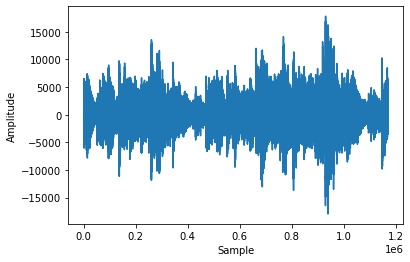

In [407]:
plt.plot(first_channel)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.show()  

C:\Users\Mihai\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


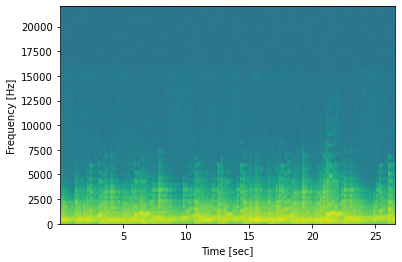

In [408]:
plt.specgram(first_channel, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()   

### Plot second channel

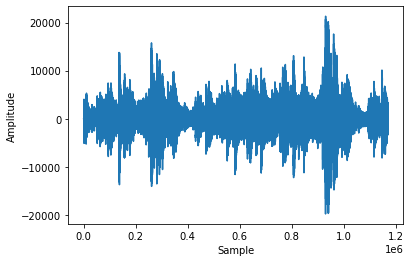

In [409]:
plt.plot(second_channel)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.show()  

C:\Users\Mihai\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


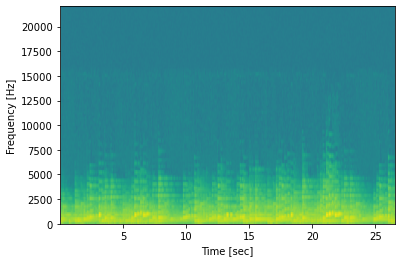

In [410]:
plt.specgram(second_channel, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

## Read noisy wav file and split into 2 channels

In [411]:
# Read the .wav file
sample_rate, data = scipy.io.wavfile.read('piano_short_noisy.wav')

first_channel_noisy = data[:, 0]
second_channel_noisy = data[:, 1]

# Spectrogram of .wav file
sample_freq, segment_time, spec_data = spectrogram(first_channel, sample_rate)  
# Note sample_rate and sampling frequency values are same but theoretically they are different measures

### Plot first noisy wav channel

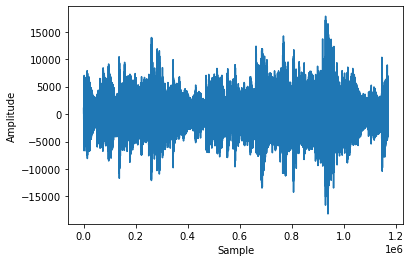

In [412]:
plt.plot(first_channel_noisy)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.show()  

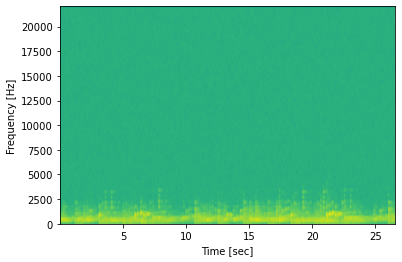

In [413]:
plt.specgram(first_channel_noisy, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

### Plot second noisy wav channel

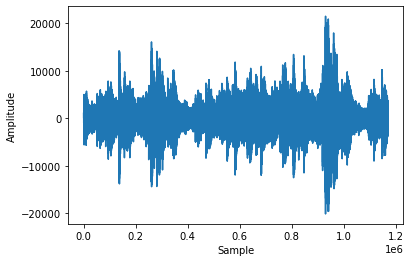

In [414]:
plt.plot(second_channel_noisy)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.show()  

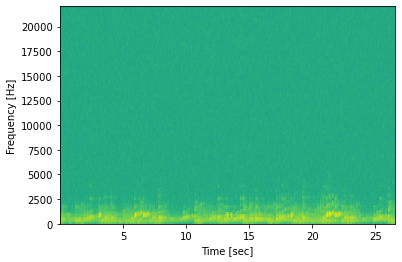

In [415]:
plt.specgram(second_channel_noisy, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

### Low pass filter

In [416]:
def intit_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

In [417]:
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = intit_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

### Filtering the two cahnnels with the lowpass filter

In [418]:
first_channel_filtered_low = lowpass_filter(first_channel_noisy, 1000, sample_rate, order=5)
second_channel_filtered_low = lowpass_filter(second_channel_noisy, 1000, sample_rate, order=5)

### Ploting the two filtered channels

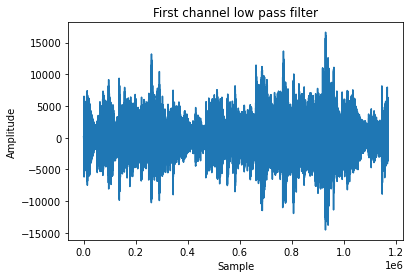

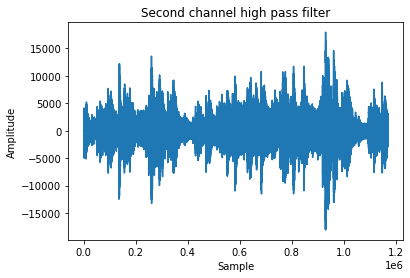

In [419]:
plt.plot(first_channel_filtered_low)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.title('First channel low pass filter')
plt.show()

plt.plot(second_channel_filtered_low)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.title('Second channel high pass filter')
plt.show()

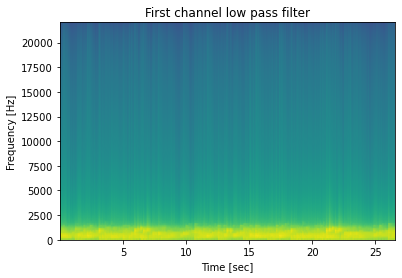

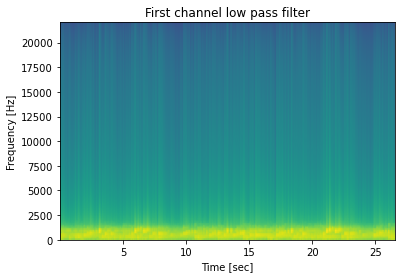

In [420]:
plt.specgram(first_channel_filtered_low, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('First channel low pass filter')
plt.show() 

plt.specgram(second_channel_filtered_low, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('First channel low pass filter')
plt.show()

### Highpass filter

In [439]:
def init_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


In [440]:
def highpass_filter(data, cutoff, fs, order=5):
    b, a = init_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

### Filtering the two channels with a highpass filter

In [441]:
first_channel_filtered_high = highpass_filter(first_channel_noisy, 2000, sample_rate)
second_channel_filtered_high = highpass_filter(second_channel_noisy, 2000, sample_rate)

### Ploting the two channels filtered withhigh pass filter

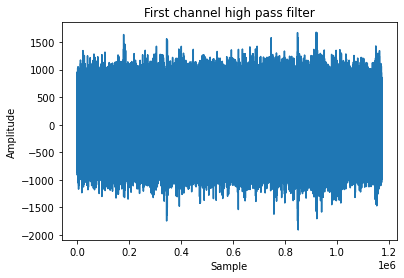

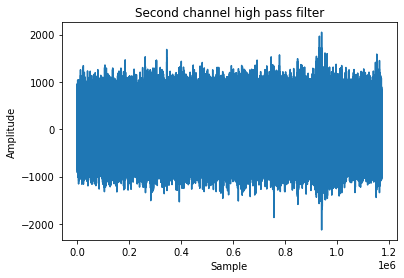

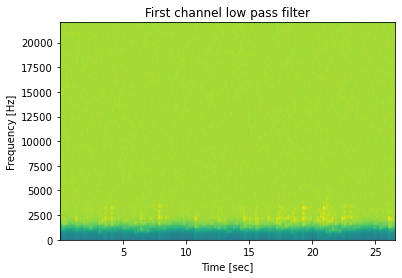

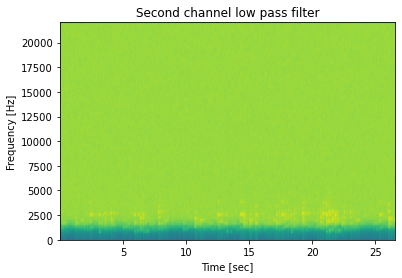

In [442]:
plt.plot(first_channel_filtered_high)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.title('First channel high pass filter')
plt.show()

plt.plot(second_channel_filtered_high)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.title('Second channel high pass filter')
plt.show()

plt.specgram(first_channel_filtered_high, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('First channel low pass filter')
plt.show()

plt.specgram(second_channel_filtered_high, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Second channel low pass filter')
plt.show()

### Creating a bandpass filter

In [443]:
def init_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = init_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

### Filtering the two channels with a bandpass filter

In [444]:
first_channel_filtered_band = bandpass_filter(first_channel_noisy, 1000, 20000, sample_rate)
second_channel_filtered_band = bandpass_filter(second_channel_noisy, 1000, 2000, sample_rate)

### Ploting the two channels filtered with bandpass filter

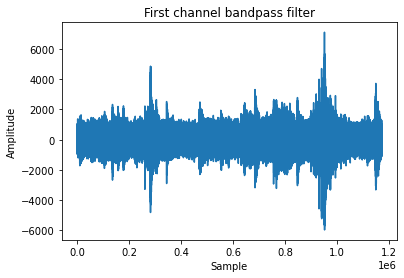

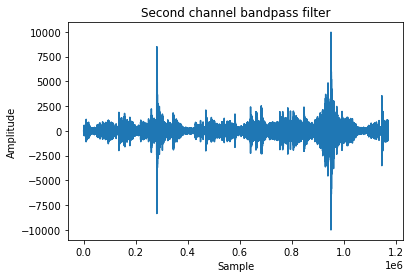

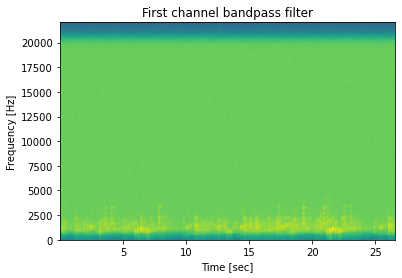

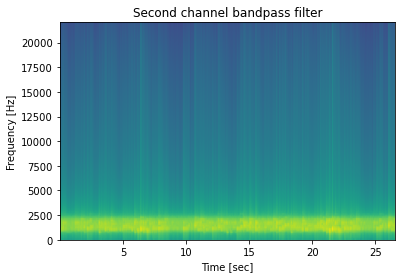

In [445]:
plt.plot(first_channel_filtered_band)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.title('First channel bandpass filter')
plt.show()

plt.plot(second_channel_filtered_band)
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.title('Second channel bandpass filter')
plt.show()

plt.specgram(first_channel_filtered_band, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('First channel bandpass filter')
plt.show()

plt.specgram(second_channel_filtered_band, Fs=sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Second channel bandpass filter')
plt.show()

### Writing the results in a wav file

In [446]:
wav_file = wave.open('result.wav', "w")
wav_file.setparams((1, ampWidth, sampleRate, nFrames, spf.getcomptype(), spf.getcompname()))
wav_file.writeframes(np.concatenate((first_channel_filtered_band.astype(int), second_channel_filtered_band.astype(int))).tobytes('C'))
wav_file.close()